In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
data = yf.download(stocks, start="2020-01-01", end="2024-12-24")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1253 entries, 2020-01-02 to 2024-12-23
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, AAPL)    1253 non-null   float64
 1   (Close, AMZN)    1253 non-null   float64
 2   (Close, GOOGL)   1253 non-null   float64
 3   (Close, MSFT)    1253 non-null   float64
 4   (Close, TSLA)    1253 non-null   float64
 5   (High, AAPL)     1253 non-null   float64
 6   (High, AMZN)     1253 non-null   float64
 7   (High, GOOGL)    1253 non-null   float64
 8   (High, MSFT)     1253 non-null   float64
 9   (High, TSLA)     1253 non-null   float64
 10  (Low, AAPL)      1253 non-null   float64
 11  (Low, AMZN)      1253 non-null   float64
 12  (Low, GOOGL)     1253 non-null   float64
 13  (Low, MSFT)      1253 non-null   float64
 14  (Low, TSLA)      1253 non-null   float64
 15  (Open, AAPL)     1253 non-null   float64
 16  (Open, AMZN)     1253 non-null   float64
 

In [4]:
print(data.head())

Price           Close                                                    High  \
Ticker           AAPL       AMZN      GOOGL        MSFT       TSLA       AAPL   
Date                                                                            
2020-01-02  72.716072  94.900497  68.186813  153.323257  28.684000  72.776598   
2020-01-03  72.009117  93.748497  67.830116  151.414093  29.534000  72.771745   
2020-01-06  72.582901  95.143997  69.638054  151.805481  30.102667  72.621639   
2020-01-07  72.241570  95.343002  69.503548  150.421371  31.270666  72.849247   
2020-01-08  73.403648  94.598503  69.998253  152.817322  32.809334  73.706279   

Price                                                    ...       Open  \
Ticker           AMZN      GOOGL        MSFT       TSLA  ...       AAPL   
Date                                                     ...              
2020-01-02  94.900497  68.186813  153.428261  28.713333  ...  71.721019   
2020-01-03  94.309998  68.439411  152.683675  30.26

In [5]:
df_long = data.stack(level=1).reset_index()
df_long.columns = ["Date", "Stock", "Open", "High", "Low", "Close", "Volume"]

In [6]:
print(df_long.isnull().values.any())  # Returns True if there are missing values, False otherwise

False


In [7]:
print(df_long.isnull().sum())

Date      0
Stock     0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


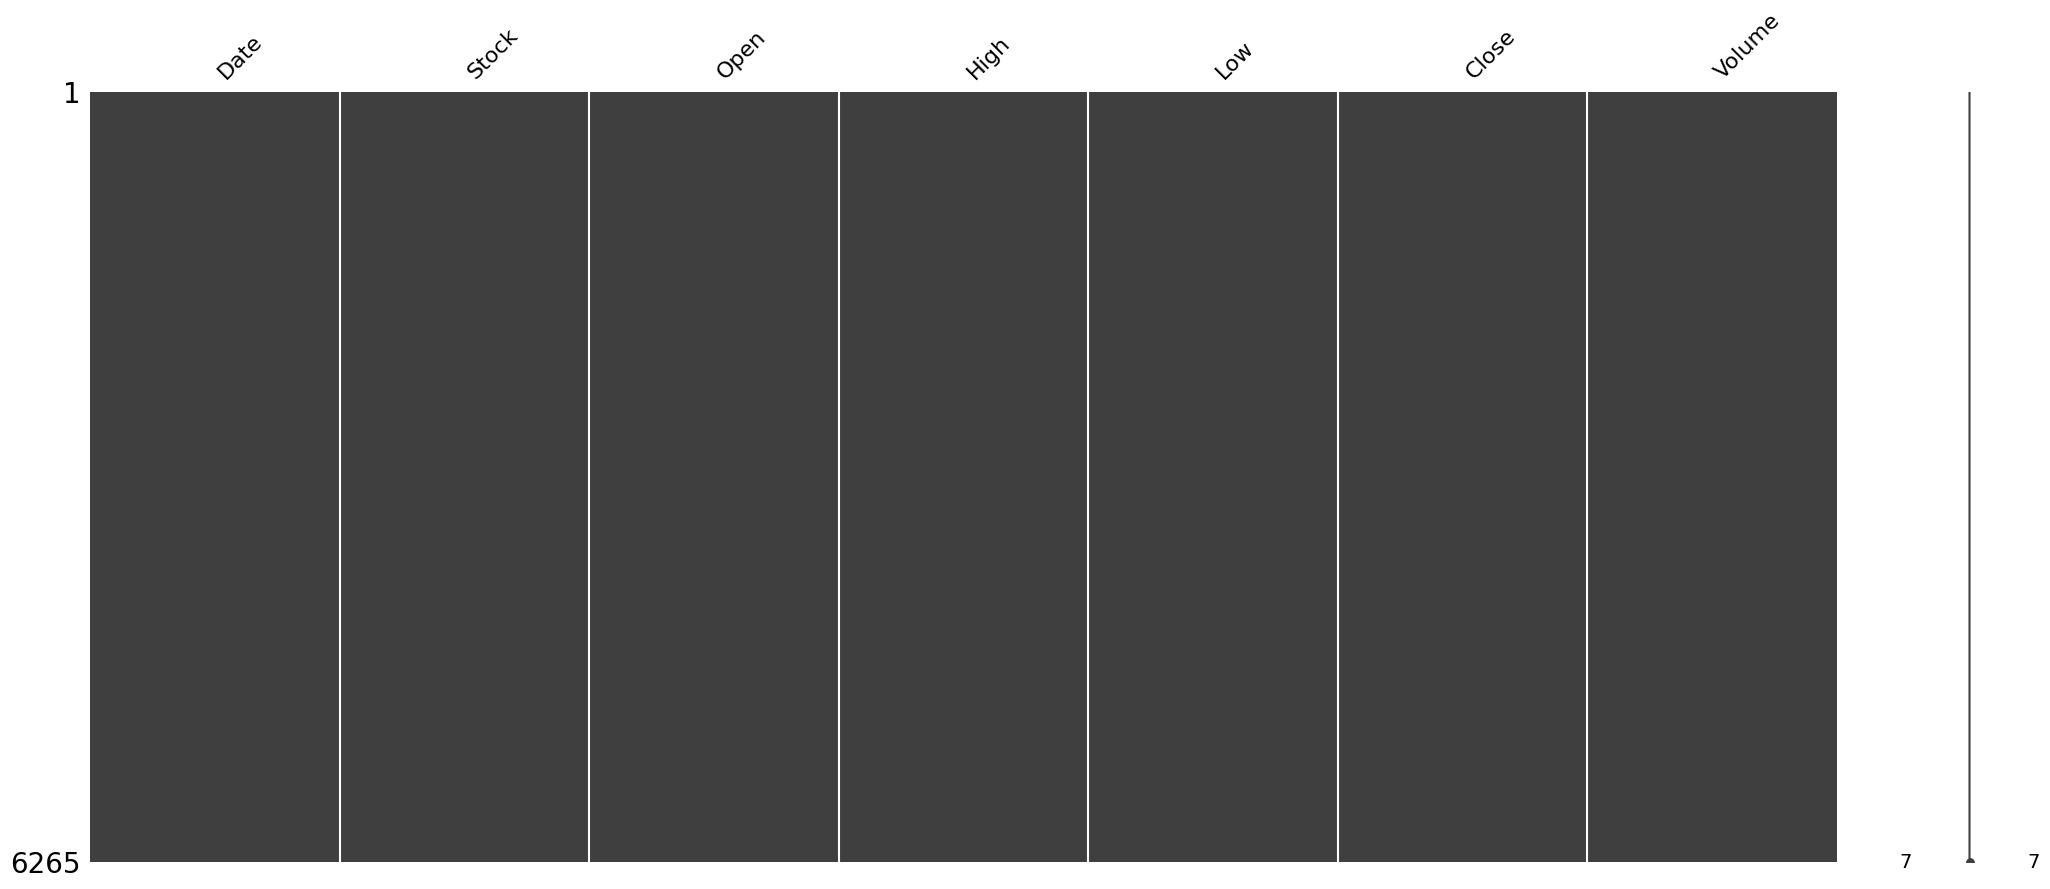

In [8]:
msno.matrix(df_long)
plt.show()

In [9]:
df_long.to_csv("cleaned_stock_data.csv", index=False)

In [10]:
df_long["Date"] = pd.to_datetime(df_long["Date"])

In [11]:
df_long.set_index("Date", inplace=True)

In [12]:
print(df_long.index)

DatetimeIndex(['2020-01-02', '2020-01-02', '2020-01-02', '2020-01-02',
               '2020-01-02', '2020-01-03', '2020-01-03', '2020-01-03',
               '2020-01-03', '2020-01-03',
               ...
               '2024-12-20', '2024-12-20', '2024-12-20', '2024-12-20',
               '2024-12-20', '2024-12-23', '2024-12-23', '2024-12-23',
               '2024-12-23', '2024-12-23'],
              dtype='datetime64[ns]', name='Date', length=6265, freq=None)


In [13]:
df_long.sort_index(inplace=True)

In [14]:
print(df_long.head())

            Stock        Open        High         Low       Close     Volume
Date                                                                        
2020-01-02   AAPL   72.716072   72.776598   71.466812   71.721019  135480400
2020-01-02   AMZN   94.900497   94.900497   93.207497   93.750000   80580000
2020-01-02  GOOGL   68.186813   68.186813   67.081324   67.176978   27278000
2020-01-02   MSFT  153.323257  153.428261  151.137295  151.566850   22622100
2020-01-02   TSLA   28.684000   28.713333   28.114000   28.299999  142981500
